<a href="https://colab.research.google.com/github/Venu-GR/INFO-5731_Venu-GR/blob/main/Vennapusa_Venu_Gopal_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load datasets
def load_dataset(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    data = [line.strip().split(' ', 1) for line in lines if line.strip()]
    df = pd.DataFrame(data, columns=["label", "text"])
    df["label"] = df["label"].astype(int)
    return df

train_data = load_dataset('stsa-train.txt')
test_data = load_dataset('stsa-test.txt')
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_data['text'])

models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train_vec, y_train, cv=10, scoring='accuracy')
    print(f"{name} - Cross-validation Accuracy: {np.mean(scores):.4f}")

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_val_vec)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    results.append((name, accuracy, precision, recall, f1))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df)


MultinomialNB - Cross-validation Accuracy: 0.7831
SVM - Cross-validation Accuracy: 0.7682
KNN - Cross-validation Accuracy: 0.6387
DecisionTree - Cross-validation Accuracy: 0.5988
RandomForest - Cross-validation Accuracy: 0.7021


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Cross-validation Accuracy: 0.6907


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:25:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


           Model  Accuracy  Precision    Recall        F1
0  MultinomialNB  0.791185   0.767677  0.852735  0.807973
1            SVM  0.796243   0.790823  0.821879  0.806052
2            KNN  0.653902   0.758850  0.481066  0.588841
3   DecisionTree  0.611994   0.617333  0.649369  0.632946
4   RandomForest  0.726156   0.716321  0.775596  0.744781
5        XGBoost  0.718208   0.694813  0.807854  0.747082


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

KMeans Silhouette Score: 0.0040


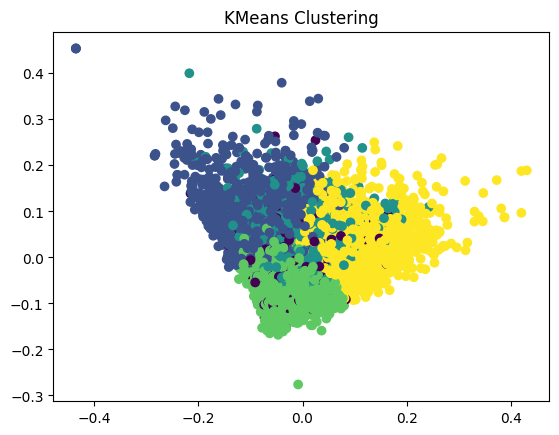

DBSCAN Silhouette Score: -0.2829


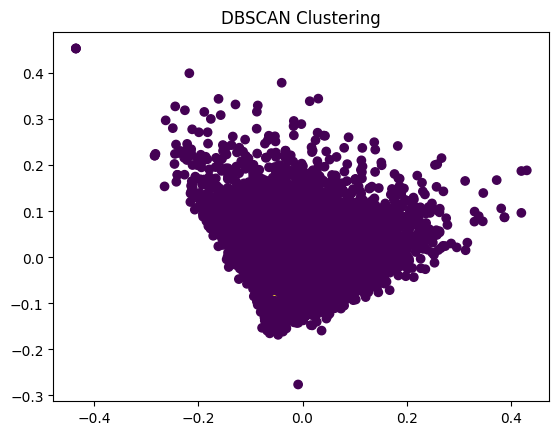

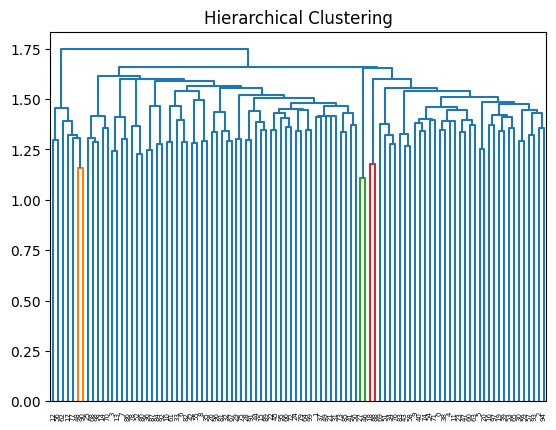

In [15]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Use the training data for clustering
X_clustering = vectorizer.fit_transform(train_data['text']).toarray()

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_clustering)
print(f"KMeans Silhouette Score: {silhouette_score(X_clustering, kmeans_labels):.4f}")

# Visualize KMeans
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_clustering)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_clustering)
print(f"DBSCAN Silhouette Score: {silhouette_score(X_clustering, dbscan_labels):.4f}")

# Visualize DBSCAN
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Apply Hierarchical Clustering
linkage_matrix = linkage(X_clustering[:100], method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering')
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



This exercise was really useful to understand some of the main concepts behind the supervised and unsupervised learning techniques of text analysis. I could follow the characteristics of feature engineering and model evaluation with metrics such as F1-score and cross-validation for classification tasks. Clustering methods just showed me how hard unsupervised learning is, above all when considering two major issues: choosing the best number of clusters and evaluating the coherence of the clusters. These are also very applicable techniques to real-world NLP tasks, such as sentiment analysis and customer segmentation. It enhances my practical understanding of the domain.